In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import numpy as np
import beadpy
import pandas as pd

In [ ]:
%matplotlib inline

In [118]:
def trajectory_simulator(pre_duration = 250, pre_sigma = 50, post = 250, mean_duration = 1000, duration_sigma = 100, mean_rate = 500, 
                         rate_sigma = 50, noise_sigma = 500, pause_prob = 0.1, 
                         pause_duration_prob = 0.2, rate_change_prob = 0.2, trajectory_number = 0):
    length = int(np.random.normal(loc=mean_duration, scale = duration_sigma))
    current_rate = 0
    pre = int(np.random.normal(loc=pre_duration, scale = pre_sigma))
    rate = 0
    ratesequence = [0]*pre
    for i in range(0,length):
        pause = random.random()
        if not rate == 0: #When during an event/no pause.
            if (pause <= pause_prob): #Start a pause
                rate = 0
            elif (pause > pause_prob) & (pause <= (pause_prob + rate_change_prob)): #Change the rate
                current_rate = np.random.normal(loc=mean_rate, scale = rate_sigma)
                rate = current_rate
            else: #No rate change
                rate = current_rate          
        elif rate == 0: #When in a pause
            if (pause < (1- pause_duration_prob)): #End the pause
                rate = np.random.normal(loc=mean_rate, scale = rate_sigma)
            else:
                rate = 0
        ratesequence.append(rate)
    for i in range(0,post):
        ratesequence.append(0)
    position = []
    current_position = 0
    for i in range(pre + length + post):
        current_position = current_position + ratesequence[i]
        position.append(current_position)
    nucleotides = []
    for i in range(0,pre + length + post):
        nucleotides.append(float(position[i]+np.random.normal(loc=0.0, scale = noise_sigma)))
    time = range(0, pre + length + post)
    results = pd.DataFrame({'time' : time,
                        'nucleotides' : nucleotides,
                           'rate' : ratesequence,
                           'position' : position})
    results['trajectory'] = trajectory_number
    return results

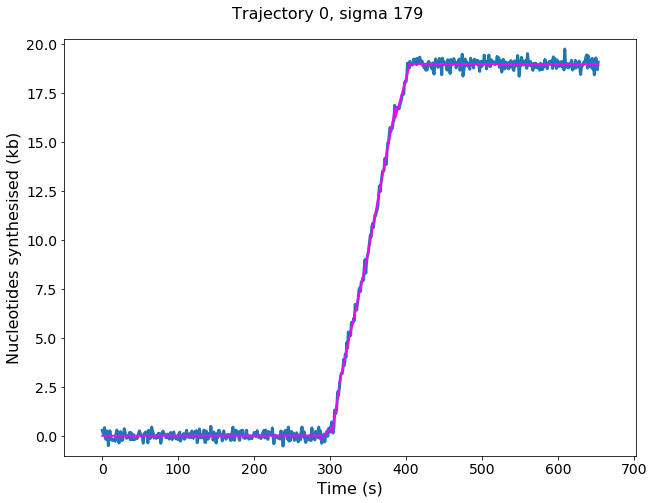

In [119]:
exampletrajseg = beadpy.trajectory_plotter(results, 0, method = ('auto', 'whole'), 
                                           sigma_start = 10, sigma_end = 250,  
                                           eventregion = (200,500), 
                                           segmenttable = 0)

In [107]:
exampletrajseg

,rate,intercept,x1,x2,y1,y2,displacement,duration,trajectory
0,0.0,-21.0,0.0,307.0,-21.2,-8.5,12.7,307.0,0.0
1,25.9,-7997.0,307.0,336.0,-50.6,700.1,750.7,29.0,0.0
2,247.9,-82798.0,336.0,350.0,496.2,3966.7,3470.6,14.0,0.0
3,60.7,-17334.0,350.0,360.0,3914.8,4521.9,607.1,10.0,0.0
4,43.1,-10412.0,360.0,377.0,5098.1,5830.6,732.4,17.0,0.0
5,277.0,-98320.0,377.0,386.0,6092.3,8584.9,2492.6,9.0,0.0
6,79.7,-22118.0,386.0,404.0,8655.7,10090.8,1435.1,18.0,0.0
7,212.1,-75785.0,404.0,413.0,9899.5,11808.3,1908.8,9.0,0.0
8,0.2,12175.0,413.0,664.0,12243.3,12285.1,41.8,251.0,0.0


Compare the table of actual changepoints below (ignoring rate changes of less than 10) with the above table of the discovered changepoints above.

In [116]:
changepoints = []
changepoint_values = []
for i in time[1:]:
    if abs(rate[i] - rate[i-1]) > 10:
        changepoints.append(i)
        changepoint_values.append(rate[i-1])
cpts = pd.DataFrame({'changepoint' : changepoints,
                    'rate' : changepoint_values})

In [153]:
results = pd.DataFrame()
for j in range(0,1000):
    temp = trajectory_simulator(pre_duration = 300, pre_sigma = 10, 
                                                   mean_duration = 100, duration_sigma = 10,
                                                   mean_rate = 200, rate_sigma = 40,
                                                   noise_sigma = 200, 
                                                   pause_prob = 0.05,pause_duration_prob = 0.2, trajectory_number = j)
    results = results.append(temp)
    

In [154]:
segments = beadpy.segment_finder(results, sigma = 200)

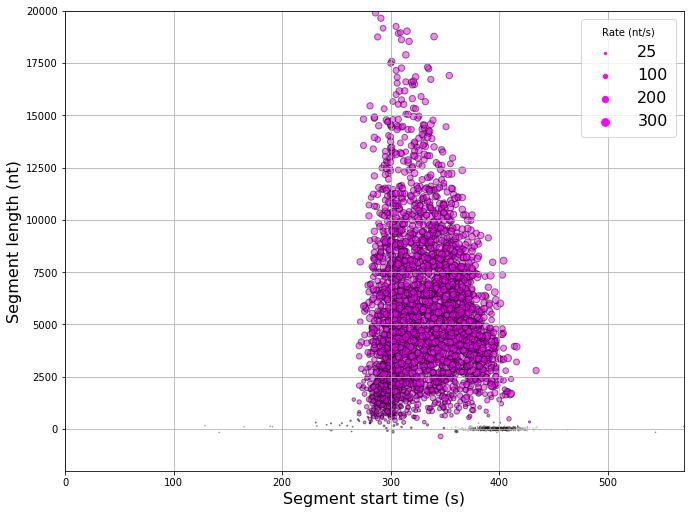

In [157]:
beadpy.segmentplotter(segments,300,-2000,20000, 1, 5)